# Image Classification Using Feature Extraction and Thresholds

This notebook demonstrates a simple threshold-based classification algorithm using features extracted from images.

In [43]:
# Import analysis functions
from pathlib import Path
import numpy as np
from analysis import (
    standardize_image, get_avg_color, get_contrast_level, detect_edges
)
import os

In [44]:
# List all file paths in dataset_dir (including subdirectories, no extension filter)
dataset_dir = Path().absolute().parent / 'dataset' / 'Data' / 'train' / 'no_label'
print(f"Dataset directory: {dataset_dir}")
image_paths = [str(p) for p in dataset_dir.rglob('*') if p.is_file()]
print(f"Found {len(image_paths)} files.")

Dataset directory: c:\Mastercamp-data\Projet_Mastercamp\dataset\Data\train\no_label
Found 560 files.


In [45]:
# Extract features for each image
features = []
for path in image_paths:
    img = standardize_image(path)
    avg_color = get_avg_color(img)
    contrast = get_contrast_level(img)
    edge_info = detect_edges(img, method='canny')
    features.append({
        'path': str(path),
        'avg_color': avg_color,
        'contrast': contrast,
        'edge_density': edge_info['statistics']['edge_density']
    })
print(f"Extracted features for {len(features)} images.")

Extracted features for 560 images.


## Define Classification Thresholds
We will use simple thresholds on average brightness, contrast, and edge density to classify images into two classes:

In [ ]:
BRIGHTNESS_THRESHOLD = 120  
CONTRAST_THRESHOLD = 40     
EDGE_DENSITY_THRESHOLD = 0.07 

In [61]:
# Classify images as 'clean' or 'dirty' using tuned thresholds
results = []
for feat in features:
    brightness = feat['avg_color'].get('brightness', feat['avg_color'].get('average_gray', 0))
    contrast = feat['contrast'].get('global_contrast', feat['contrast']).get('contrast_level', 0)

    # Use detect_edges directly on the standardized image
    img = standardize_image(feat['path'])
    edge_info = detect_edges(img, method='canny')
    edge_density = edge_info['statistics']['edge_density']

    # Clean: bright, not too contrasted, not too many edges
    # Dirty: dark, high contrast, lots of edges
    if (brightness > BRIGHTNESS_THRESHOLD and
        contrast < CONTRAST_THRESHOLD and
        edge_density < EDGE_DENSITY_THRESHOLD):
        label = 'clean'
    else:
        label = 'dirty'

    results.append({
        'path': feat['path'],
        'brightness': brightness,
        'contrast': contrast,
        'edge_density': edge_density,
        'label': label
    })
print(f"Classified {len(results)} images.")

Classified 560 images.


In [62]:
# Display classification results
import pandas as pd
df = pd.DataFrame(results)
display(df.head())

,path,brightness,contrast,edge_density,label
0,c:\Mastercamp-data\Projet_Mastercamp\dataset\D...,135.10,42.5,0.1626,dirty
1,c:\Mastercamp-data\Projet_Mastercamp\dataset\D...,151.92,34.9,0.1077,dirty
2,c:\Mastercamp-data\Projet_Mastercamp\dataset\D...,134.12,58.9,0.2298,dirty
3,c:\Mastercamp-data\Projet_Mastercamp\dataset\D...,111.34,56.5,0.1050,dirty
4,c:\Mastercamp-data\Projet_Mastercamp\dataset\D...,108.23,50.3,0.2587,dirty


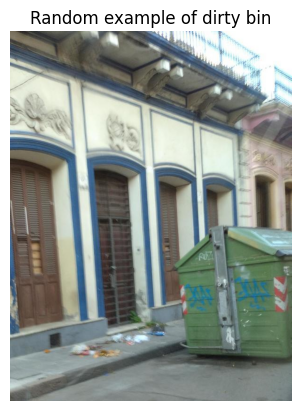

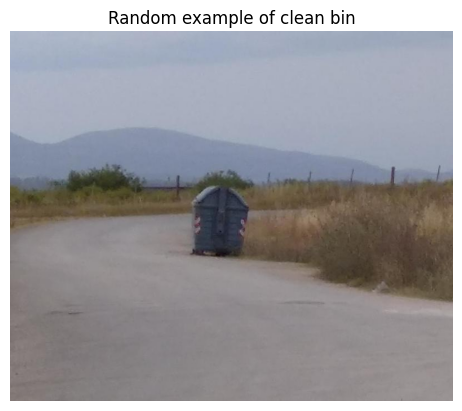

In [77]:
# Display a random example image for each class
import matplotlib.pyplot as plt
from PIL import Image
import random

for class_label in df['label'].unique():
    class_rows = df[df['label'] == class_label]
    if not class_rows.empty:
        example_row = class_rows.sample(n=1, random_state=None).iloc[0]
        img = Image.open(example_row['path'])
        plt.figure()
        plt.imshow(img)
        plt.title(f"Random example of {class_label} bin")
        plt.axis('off')
        plt.show()